In [1]:
# 패키지 불러오기
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# 시각화를 위한 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import offsetbox

In [2]:
# 행렬 시각화를 위한 보조함수 정의
def plot_matrix(matrix, numbers=True, size_scale=0.7):
    """
    matrix로 주어진 행렬을, 보기쉽게 그려주는 함수입니다.
    행렬의 크기가 큰 경우 numbers를 False로 설정해 각 원소의 값이 표시되지 않도록 하고,
    size_scale을 줄여 전체 크기를 조절할 수 있습니다.
    """
    n_rows, n_cols = matrix.shape
    # 행렬 크기에 비례하도록 figure의 사이즈 설정
    figure_size = (size_scale * n_cols, size_scale * n_rows)
    fig, ax = plt.subplots(figsize=figure_size)
    # 불필요한 부분들 비활성화
    viz_args = dict(cmap='Purples', cbar=False, xticklabels=False, yticklabels=False)
    sns.heatmap(data=matrix, annot=numbers, fmt='.2f', linewidths=.5, **viz_args)

In [3]:
# 실습파일을 여러번 실행해도 같은 결과가 나오도록 random seed를 고정합니다.
np.random.seed(1234)

# 6x9 크기의 랜덤 행렬을 생성합니다.
M = np.random.randn(6, 9)

# 단순 print을 이용하여 행렬 시각화
print(M)

[[ 4.71435164e-01 -1.19097569e+00  1.43270697e+00 -3.12651896e-01
  -7.20588733e-01  8.87162940e-01  8.59588414e-01 -6.36523504e-01
   1.56963721e-02]
 [-2.24268495e+00  1.15003572e+00  9.91946022e-01  9.53324128e-01
  -2.02125482e+00 -3.34077366e-01  2.11836468e-03  4.05453412e-01
   2.89091941e-01]
 [ 1.32115819e+00 -1.54690555e+00 -2.02646325e-01 -6.55969344e-01
   1.93421376e-01  5.53438911e-01  1.31815155e+00 -4.69305285e-01
   6.75554085e-01]
 [-1.81702723e+00 -1.83108540e-01  1.05896919e+00 -3.97840228e-01
   3.37437654e-01  1.04757857e+00  1.04593826e+00  8.63717292e-01
  -1.22091575e-01]
 [ 1.24712954e-01 -3.22794806e-01  8.41674713e-01  2.39096052e+00
   7.61995878e-02 -5.66445930e-01  3.61419367e-02 -2.07497760e+00
   2.47792200e-01]
 [-8.97156784e-01 -1.36794833e-01  1.82891913e-02  7.55413982e-01
   2.15268581e-01  8.41008795e-01 -1.44581008e+00 -1.40197328e+00
  -1.00918200e-01]]


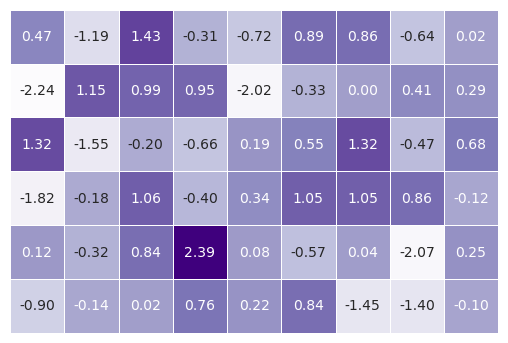

In [4]:
# 보조함수를 활용하여 행렬 시각화
plot_matrix(M)

In [5]:
def full_svd(matrix):
    # numpy를 이용한 SVD를 수행합니다.
    U, singular_values, V = np.linalg.svd(matrix)

    # numpy의 svd 결과로 나오는 sigma의 diagonal 성분을 가지고 diagonal matrix를 복원해줍니다.
    m, n = matrix.shape       # matrix 행렬의 차원
    sigma = np.zeros([m, n])  # matrix 행렬과 같은 차원의 영행렬을 만들어둡니다.

    rank = len(singular_values)  # rank 계산
    sigma[:rank, :rank] = np.diag(singular_values)  # rank까지만 복원
    return U, sigma, V.T

In [6]:
# SVD 수행
U, Sigma, V = full_svd(M)

Maximum diff:  1.7763568394002505e-15


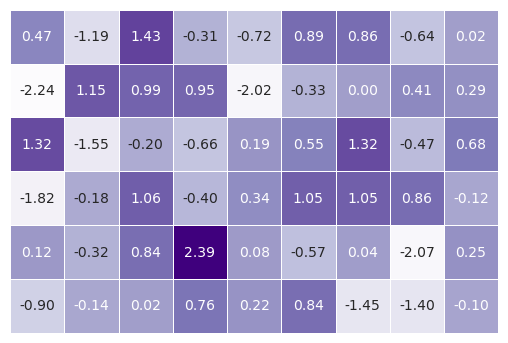

In [7]:
# 파이썬의 @ 연산자를 이용하면 np.dot 함수와 같은 행렬곱이나 내적을 편리하게 호출할 수 있습니다.
restored = U @ Sigma @ V.T # T는 전치행렬(transpose)

# 행렬 시각화
plot_matrix(restored)
print("Maximum diff: ", np.abs(M - restored).max())

In [8]:
# U, Sigma, V의 shape 확인
print(U.shape, Sigma.shape, V.shape)

(6, 6) (6, 9) (9, 9)


1.6653345369377348e-16
0.9999999999999998


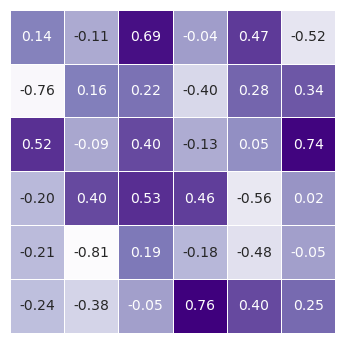

In [9]:
# 행렬 U를 시각화
plot_matrix(U)

# 행렬의 서로 다른 row를 골라 내적하면 0이 나옵니다.
print(U[1] @ U[3])

# 자기 자신과의 내적(벡터의 norm, 길이라고 생각할수 있는 개념)은 항상 1이 나옵니다.
print(U[1] @ U[1])

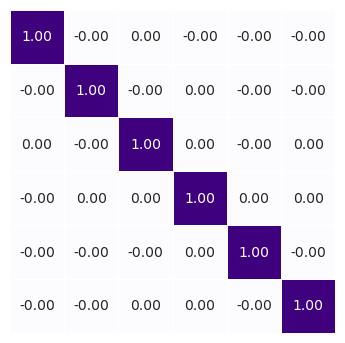

In [10]:
# U @ U.T 행렬 시각화
plot_matrix(U @ U.T)

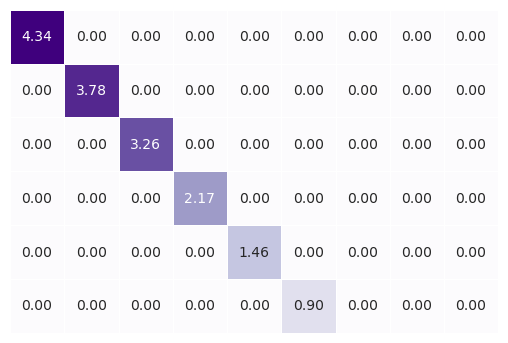

In [11]:
# Sigma 행렬 시각화
plot_matrix(Sigma)

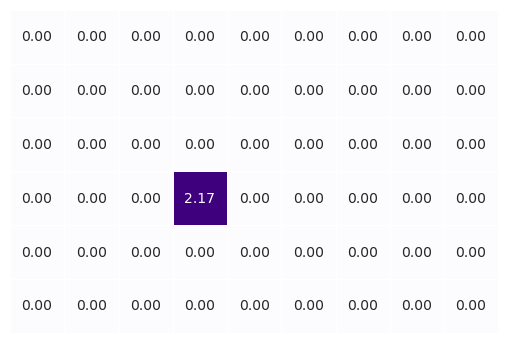

In [12]:
# 행렬의 (k,k)번째 원소만 남기고 나머지를 0으로 만드는 함수 정의
def select_diag(sigma, k):
    result = np.zeros_like(sigma)  # 영행렬 만들어두기
    result[k, k] = sigma[k, k]  # sigma 행렬의 (k,k) 원소만 남김
    return result

# Sigma의 (k,k)번째 원소만 남기고 나머지를 0으로 만들기
sigma_k = select_diag(Sigma, 3)
# 결과 행렬 시각화
plot_matrix(sigma_k)

Maximum diff:  1.7763568394002505e-15


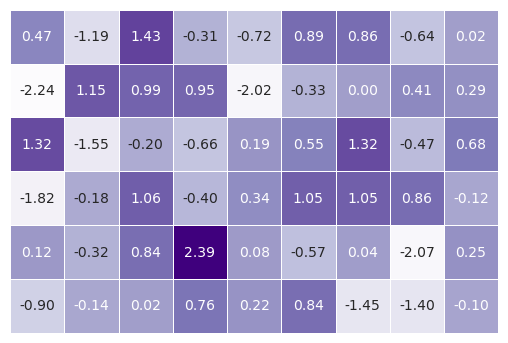

In [13]:
# 원래 행렬의 rank
r = np.linalg.matrix_rank(M)

# 결과 행렬을 미리 initialize
result = np.zeros_like(M)
for k in range(r):
    # Sigma_k를 계산 후 결과행렬에 더해줌.
    sigma_k = select_diag(Sigma, k)
    result += U @ sigma_k @ V.T

# 결과 행렬과 원래 행렬의 차이를 계산
print("Maximum diff: ", np.abs(M - result).max())
# 결과 행렬 시각화
plot_matrix(result)

Maximum diff:  1.7763568394002505e-15


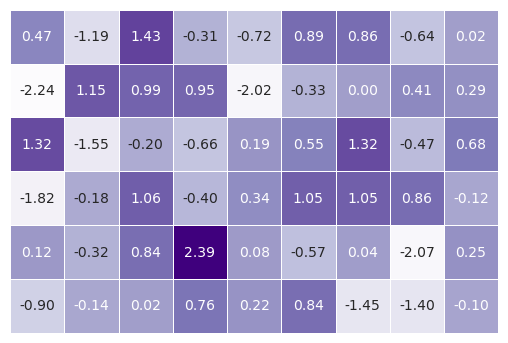

In [14]:
# k번째 열벡터를 가져오는 함수를 정의
def col_vec(matrix, k):
    return matrix[:, [k]]

# 원래 행렬의 rank
r = np.linalg.matrix_rank(M)

# 결과 행렬을 미리 initialize
result = np.zeros_like(M)
for k in range(r):
    # k번째 singular value, 스칼라값
    sig_k = Sigma[k, k]
    # U, V에서 한개의 column vector만을 가져와 사용해도 위 셀과 동일한 결과
    result += sig_k * col_vec(U, k) @ col_vec(V, k).T

# 결과 행렬과 원래 행렬의 차이를 계산
print("Maximum diff: ", np.abs(M - result).max())
# 결과 행렬 시각화
plot_matrix(result)

(6, 1)
(1, 9)
(6, 9)
Rank of resulting Rank-1 Matrix:  1


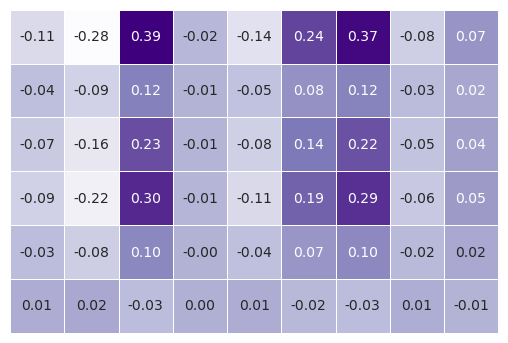

In [15]:
# 임의의 k를 선택합니다.
k = 2
# 곱해지는 U, V의 열벡터를 표시합니다.
print(col_vec(U, k).shape)
print(col_vec(V, k).T.shape)

# 두 벡터의 행렬곱으로 rank-1 matrix를 만듭니다.
rank1_mat = col_vec(U, k) @ col_vec(V, k).T

print(rank1_mat.shape)

# 이름처럼 rank는 1로 나옵니다.
print("Rank of resulting Rank-1 Matrix: ", np.linalg.matrix_rank(rank1_mat))

# matrix의 값들을 살펴보면, 첫번째 row에 스칼라곱을 해서 나머지 모든
# row를 만들수 있고(linearly dependence), 이는 column도 마찬가지입니다.
plot_matrix(rank1_mat)

In [16]:
def reduce_dim(M, n_components=None):
    # 주어진 행렬 M을 SVD합니다.
    U, Sigma, V = full_svd(M)

    r = np.linalg.matrix_rank(M)
    if n_components is None:
        # 몇개의 성분을 남길지 주어지지 않으면 아무것도 버리지 않고 전체 성분을 남깁니다.
        n_components = r

    # 남길 component 수가 전체 랭크보다 크면 에러 메시지 보여줍니다.
    assert n_components <= r, \
        f"남길 component의 개수({n_components})는 전체 랭크{r}보다 클 수 없습니다."

    # 결과 행렬을 미리 initialize
    result = np.zeros_like(M, dtype=np.float64)
    # 이번에는 r개가 아니라, 첫 n_components개까지만 rank-1 matrix들을 더해줍니다.
    for k in range(n_components):
        # k번째 singular value, 스칼라값과
        sig_k = Sigma[k, k]
        # rank1 행렬에 위 sig_k 스칼라값을 곱해 결과에 더함.
        result += sig_k * col_vec(U, k) @ col_vec(V, k).T
    return result

In [17]:
# 남길 성분의 수. 이 값을 0~6까지 직접 값을 조절해볼수 있습니다.
n_components = 5
size_scale = 0.6 # 비교해보기 편하도록 figure크기를 살짝 줄입니다.

# 원래 행렬의 rank를 구해봅니다.
print("Original rank: ", np.linalg.matrix_rank(M))

# TruncatedSVD를 수행해 n_component개의 성분만 남깁니다.
result = reduce_dim(M, n_components)

# TruncatedSVD 결과 행렬의 rank와 원본 행렬과의 값 차이를 프린트합니다.
print("Result rank: ", np.linalg.matrix_rank(result))
print("Maximum diff: ", np.abs(M - result).max())

Original rank:  6
Result rank:  5
Maximum diff:  0.43067207518715733


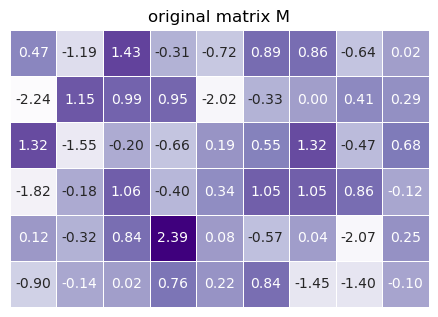

In [18]:
# 원래의 행렬
plot_matrix(M, size_scale=size_scale)
plt.title('original matrix M')  # 구분을 위해 시각화 제목 넣기
plt.show()                      # 그림 보여주기

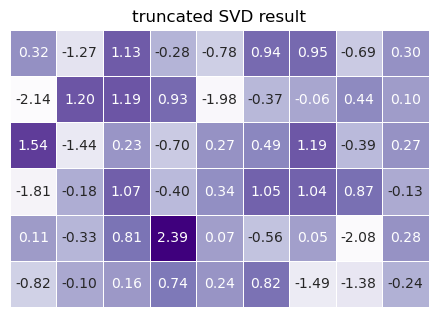

In [19]:
# truncated svd 결과 행렬
plot_matrix(result, size_scale=size_scale)
plt.title('truncated SVD result')  # 구분을 위해 시각화 제목 넣기
plt.show()               # 그림 보여주기

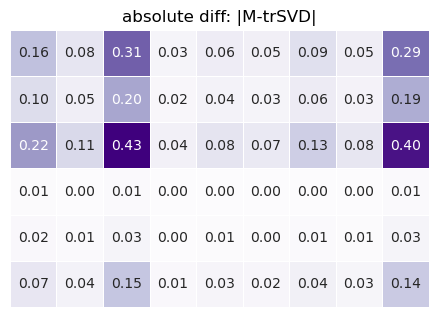

In [20]:
# 원래 행렬과의 차이(absolute diff)
plot_matrix(np.abs(M - result), size_scale=size_scale)
plt.title('absolute diff: |M-trSVD|')  # 구분을 위해 시각화 제목 넣기
plt.show()                  # 그림 보여주기

In [21]:
# 데이터 불러오기
faces, _ = datasets.fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=1234)

n_samples, n_features = faces.shape
print('데이터 수:', n_samples) # 데이터 수 확인
print('차원 수:', n_features) # 차원수 확인

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/pervinco/scikit_learn_data
데이터 수: 400
차원 수: 4096


In [22]:
# 첫번째 데이터 확인하기
faces[0, :]

array([0.5082645 , 0.5082645 , 0.5082645 , ..., 0.60330576, 0.59504133,
       0.59917355], dtype=float32)

In [23]:
# 데이터 범위 확인하기
print('평균:', faces.mean())
print('최댓값:', faces.max())
print('최솟값:', faces.min())

평균: 0.54704267
최댓값: 1.0
최솟값: 0.0


105-th row of matrix


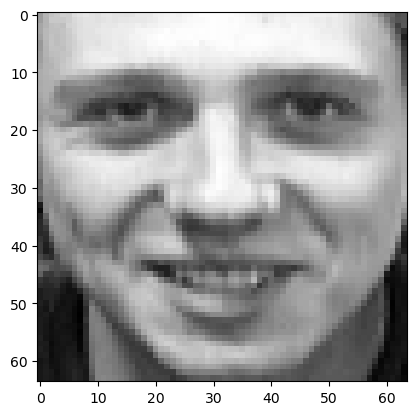

In [24]:
# 가져올 샘플의 번호를 랜덤으로 고름
index = np.random.choice(len(faces))
print(f"{index}-th row of matrix")

# 원본 이미지의 크기
img_h, img_w = (64, 64)

# 데이터(faces)에서 샘플(row)을 선택해 가져오기
face_vector = faces[index]

# 이미지를 원래의 크기로 변환한 후 display
face_image = face_vector.reshape(img_h, img_w)
plt.imshow(face_image, cmap="gray")

In [25]:
# 전체 샘플단위의 평균을 구하고, 이를 원본 데이터에서 빼서 평균을 0으로 맞춰줌
samplewise_mean = faces.mean(axis=0) # (4096, )
faces_centered = faces - samplewise_mean

# 각 이미지마다 모든 픽셀값의 평균을 구하고, 이를 원본 이미지에서 빼는 방식으로 평균을 0으로 맞춰줌
pixelwise_mean = faces_centered.mean(axis=1).reshape(n_samples, -1) # (400, )
faces_centered -= pixelwise_mean

In [26]:
# 시각화를 위한 함수 정의하기
def plot_faces(title, images, n_cols=3, n_rows=2, shuffle=False, cmap="gray", size_scale=2.0, random_seed=0, image_shape=(64, 64)):
    # plot할 이미지(벡터)들을 랜덤으로 선택
    if shuffle:
        np.random.seed(random_seed)
        indices = np.random.choice(len(images), n_cols * n_rows)
    else:
        indices = np.arange(n_cols * n_rows)

    # figure관련 설정
    fig, axs = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(n_cols * size_scale, n_rows * size_scale),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)

    # 각 자리에 들어가는 얼굴 이미지를 plot
    for ax, idx in zip(axs.flat, indices):
        face_vec = images[idx]
        vmax = max(face_vec.max(), - face_vec.min())
        im = ax.imshow(
            face_vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")
    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

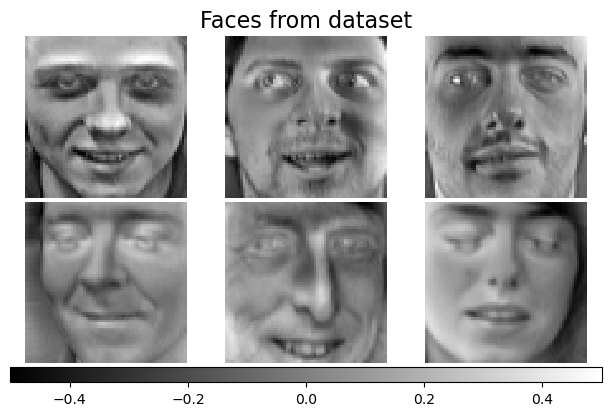

In [27]:
# 이미지 6개 시각화하기
plot_faces("Faces from dataset", faces_centered, shuffle=True, random_seed=1234)

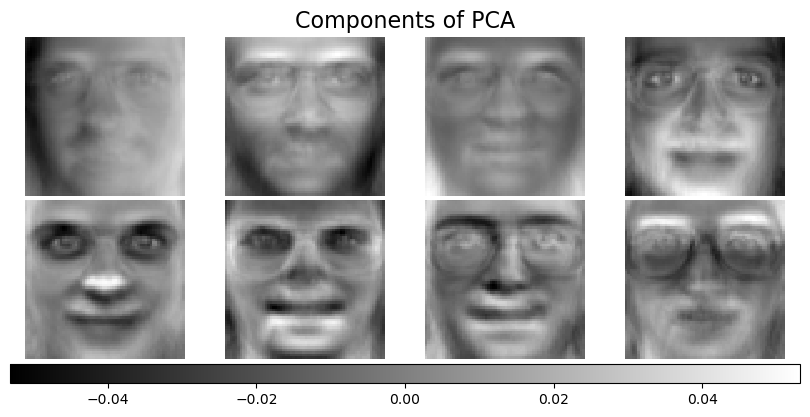

In [28]:
# 줄일 차원의 수 지정하기
n_components = 20

# PCA 수행하기
pca_estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
pca_estimator.fit(faces_centered)

# PCA 결과 (Eigenface) 시각화
plot_faces("Components of PCA", pca_estimator.components_, n_rows=2, n_cols=4)

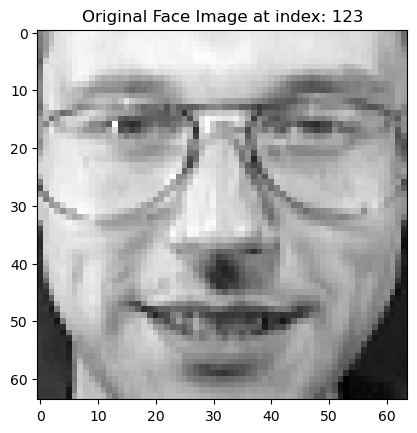

In [29]:
# 원본 이미지중에 임의로 하나를 고릅니다.
index = 123
indices = np.random.choice(n_samples, 6)
# 원본 이미지를 보여줍니다.
plt.title(f"Original Face Image at index: {index}")
plt.imshow(faces[index].reshape(64, 64), cmap="gray")

In [30]:
# 차원축소된 벡터 계산하기
reduced_vec = pca_estimator.transform(faces_centered[index].reshape(1, -1))
print(reduced_vec)
print('차원 축소된 벡터의 크기:', reduced_vec.shape)

[[-0.94087636  0.14278968 -1.5851132  -0.17484196  1.2675636  -0.3188029
  -0.71996593  1.6460472   0.38831937 -1.4495695  -0.18705602  0.75429004
   0.28385246  1.7160176   1.5398414   0.90737265 -0.15088783  0.8248486
  -0.5109068  -0.7519163 ]]
차원 축소된 벡터의 크기: (1, 20)


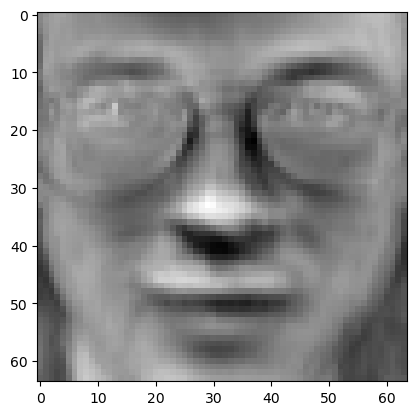

In [31]:
# 결과 행렬 미리 initialize
canvas = np.zeros([64, 64], dtype=np.float64)
for value, comp in zip(reduced_vec[0], pca_estimator.components_):
    # 각 component 벡터를 이미지 크기로 resize한 뒤, 이를 차원축소된 벡터의 각 값과 선형결합
    canvas += comp.reshape(64, 64) * value

vmax = max(canvas.max(), - canvas.min())

plt.imshow(canvas, cmap="gray", vmax=vmax, vmin=-vmax)

In [32]:
# 원본 이미지와 차원축소된 이미지들 비교하기
def compare_reduced_faces(title, images, index=123, n_components_list=[5, 20, 100], n_cols=4, n_rows=1, shuffle=False, cmap="gray", size_scale=2.5, random_seed=0, image_shape=(64, 64)):
    # 그림 관련 설정
    fig, axs = plt.subplots(
        nrows=n_rows, ncols=n_cols,
        figsize=(n_cols * size_scale, n_rows * size_scale),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")

    # 보여줄 이미지 선정
    face_vec = faces[index]

    # 첫 이미지로 원본 이미지를 보여줍니다.
    axs[0].set_title("Original Face Image", y=-0.2)
    axs[0].imshow(face_vec.reshape(image_shape), cmap="gray")
    axs[0].axis("off")

    # 다음 이미지부터는 PCA를 이용해 차원축소된 이미지를 보여줍니다.
    # 각 차원마다 보여주므로 줄일 차원의 수 리스트 중 하나씩 지정하여 PCA를 수행합니다.
    for img_index, n_components in enumerate(n_components_list):

        # PCA 수행하기
        pca_estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
        pca_estimator.fit(images)

        # 차원축소된 벡터 계산하기
        reduced_vec = pca_estimator.transform(face_vec.reshape(1, -1))
        # 결과 행렬 미리 initialize
        canvas = np.zeros([64, 64], dtype=np.float64)
        for value, comp in zip(reduced_vec[0], pca_estimator.components_):
            # 각 component 벡터를 이미지 크기로 resize한 뒤, 이를 차원축소된 벡터의 각 값과 선형결합
            canvas += comp.reshape(64, 64) * value

        # PCA 결과 (Eigenface) 시각화
        vmax = max(canvas.max(), - canvas.min())
        im = axs[img_index+1].imshow(
            canvas.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        axs[img_index+1].axis("off")
        axs[img_index+1].set_title(f'Dimension={n_components}', y=-0.2)

    # 최종 이미지 보여주기
    plt.suptitle(title + f': images at index {index}', fontsize=20)
    plt.show()

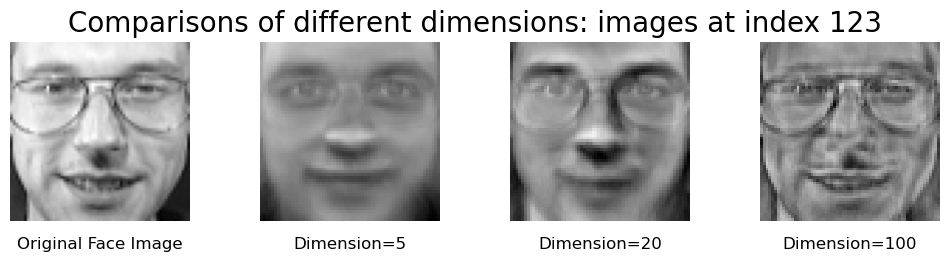

In [33]:
compare_reduced_faces('Comparisons of different dimensions', faces_centered, n_components_list=[5, 20, 100])

In [34]:
# singular value 확인하기
pca_estimator.singular_values_

array([67.12955 , 50.25966 , 41.992928, 37.27192 , 31.780443, 28.802637,
       25.470324, 25.337265, 23.112795, 22.469479, 21.30662 , 20.094725,
       19.481878, 18.365599, 17.794641, 17.228048, 16.356894, 15.426773,
       15.386461, 14.981869], dtype=float32)

In [35]:
# 기존 faces데이터셋과 같은 크기의 랜덤 정규분포 데이터를 생성
random_noises = np.random.randn(*faces_centered.shape)

# 이 랜덤 포인트에 대해 PCA 수행하기
pca_estimator = PCA(n_components=n_components, svd_solver="full", whiten=True)
pca_estimator.fit(random_noises)

PCA(n_components=20, svd_solver='full', whiten=True)

In [36]:
# singular value 확인하기
pca_estimator.singular_values_

array([83.5887657 , 82.92722517, 82.69418105, 82.31875922, 82.17663953,
       82.03255736, 81.88078954, 81.84987268, 81.63063712, 81.44304361,
       81.22199917, 80.98240317, 80.81881545, 80.72756242, 80.6510092 ,
       80.38059351, 80.12909358, 80.02599407, 79.85653646, 79.72950215])

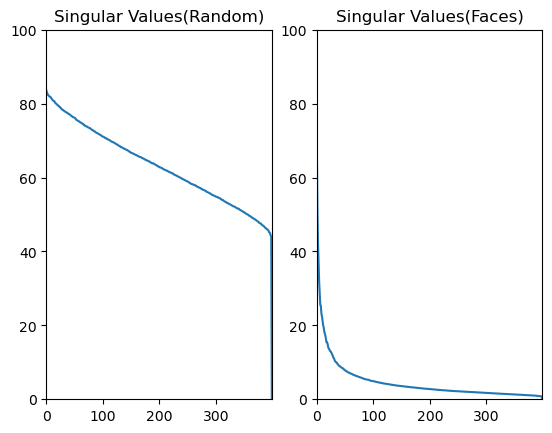

In [37]:
# 얼굴 데이터에 대해 최대 n_components로 PCA 수행하기
pca_faces = PCA(n_components=400, svd_solver="full", whiten=True)
pca_faces.fit(faces_centered)
sv_faces = pca_faces.singular_values_

# 랜덤 데이터에 대해 최대 n_components로 PCA 수행하기
pca_random = PCA(n_components=400, svd_solver="full", whiten=True)
pca_random.fit(random_noises)
sv_random = pca_random.singular_values_


# 각각의 singular value들을 plot해 비교.
plt.subplot(121)
plt.title("Singular Values(Random)")
plt.xlim(0, 399)
plt.ylim(0, 100)
plt.plot(sv_random)

plt.subplot(122)
plt.title("Singular Values(Faces)")
plt.xlim(0, 399)
plt.ylim(0, 100)
plt.plot(sv_faces)

In [38]:
# 데이터 불러오기
digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
print('데이터 수:', n_samples) # 데이터 수 확인
print('차원 수:', n_features) # 차원수 확인

데이터 수: 1083
차원 수: 64


In [39]:
# 첫번째 데이터 확인하기
X[[0]]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

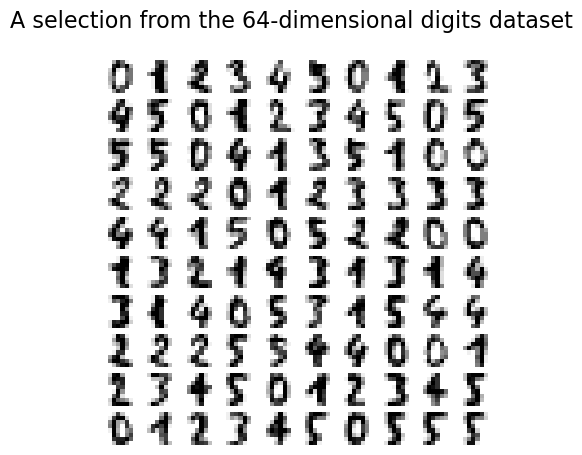

In [40]:
# 숫자 이미지 시각화
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(5, 5))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [41]:
# plot helper 함수 정의
def plot_embedding(X, title):
    _, ax = plt.subplots()
    # 정규화
    X = MinMaxScaler().fit_transform(X)
    # 색깔로 숫자로 scatter 표시
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    # 이미지 그림 표시
    shown_images = np.array([[1.0, 1.0]])
    for i in range(X.shape[0]):
        # 모든 숫자 임베딩을 scatter하고, 숫자 그룹에 annotation box를 보기
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        # 보기 쉽게 하기 위해 너무 가까운 데이터는 보여주지 않기
        if np.min(dist) < 4e-3:
            continue
        # 이미지 합치기
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

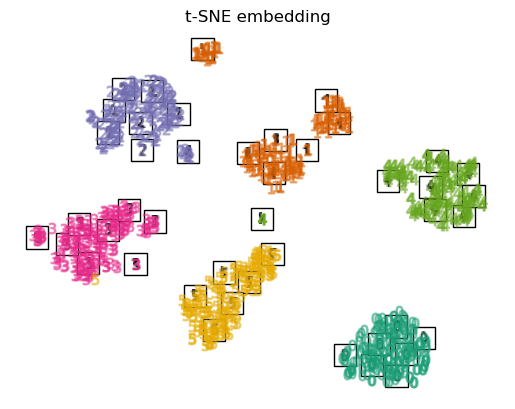

In [42]:
# t-SNE 적용
transformer = TSNE(n_components=2, random_state=0)
projection = transformer.fit_transform(X, y)

# t-SNE 결과 시각화
plot_embedding(projection, 't-SNE embedding')
plt.show()

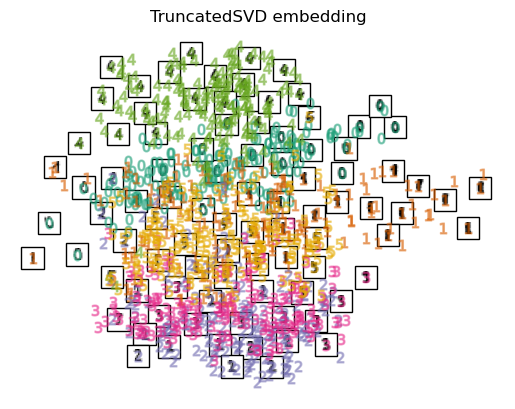

In [43]:
# Truncated SVD 적용
transformer = TruncatedSVD(n_components=2)
projection = transformer.fit_transform(X, y)

# TruncatedSVD 결과 시각화
plot_embedding(projection, 'TruncatedSVD embedding')
plt.show()